lambda_val:1, mu_val:800
模擬 1000 次後的平均失效時間 (TTF) 在 600 內的機率為: 0.313
失效時間 (TTF) 的 0.8 位數分位數為: 454.0
失效時間 (TTF) 的 0.8 位數分位數的 95% 信心區間：[ 68.  523.6]
Shapiro-Wilk 測試的 p-value 為: 1.6143417269631755e-07，拒絕虛無假設，失效時間數據不符合常態分佈。


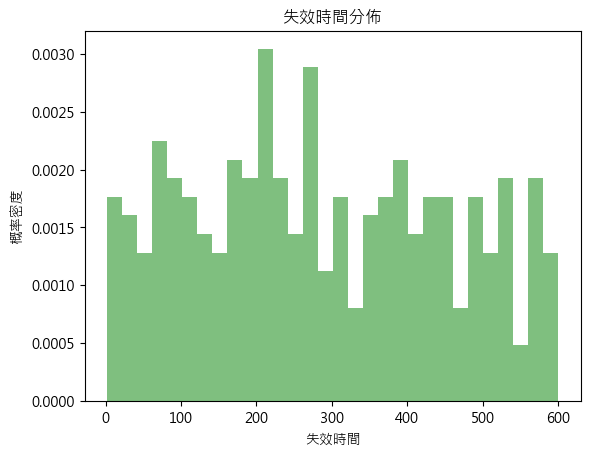

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 在函數外部宣告 ttf_values
ttf_values = []
ttf_upper_bound = 600

def airline_reservation_system(replications, lambda_val, mu_val):
    global ttf_values  # 使用 global 關鍵字來確保在函數內部使用外部的 ttf_values
    fail_count = 0
    ttf_values = []  # 重新初始化 ttf_values
    
    for _ in range(replications):
        total_ttf = 0
        state = 2

        while state > 0:
            if total_ttf == ttf_upper_bound:
                break
            if state == 2:
                fail = np.random.exponential(1/lambda_val)
                total_ttf += 1
                state = 1
            else:
                fail = np.random.exponential(1/lambda_val)
                repair = np.random.exponential(1/mu_val)
                if repair < fail:
                    total_ttf += 1
                    state = 2
                else:
                    total_ttf += 1
                    state = 0
                    fail_count += 1
                    ttf_values.append(total_ttf)

    print(f'lambda_val:{lambda_val}, mu_val:{mu_val}')
    # 檢查失效時間是否符合常態分佈
    _, p_value = shapiro(ttf_values)
    fail_rate = fail_count / replications
    print(f"模擬 {replications} 次後的平均失效時間 (TTF) 在 {ttf_upper_bound} 內的機率為: {fail_rate}")

    # 計算 0.8 位數的分位數
    quantile_08 = np.quantile(ttf_values, 0.8)
    print(f"失效時間 (TTF) 的 0.8 位數分位數為: {quantile_08}")
    
    # 計算平均失效時間在 600 內的機率的 95% 信心區間
    fail_rate_ci = stats.norm.interval(0.95, loc=fail_rate, scale=stats.sem(ttf_values))

    # 計算失效時間的 0.8 位數分位數的 95% 信心區間
    quantile_08_ci = np.percentile(ttf_values, [10, 90])
    
    print(f"失效時間 (TTF) 的 0.8 位數分位數的 95% 信心區間：{quantile_08_ci}")

    return p_value, fail_rate, quantile_08

# 設定參數
replications = 1000
lambda_val = 1  # lambda 是失效速率
mu_val = 800      # mu 是修復速率

# 執行模擬
p_value, fail_rate, quantile_08 = airline_reservation_system(replications, lambda_val, mu_val)

# 判斷結果
if p_value < 0.05:
    print(f"Shapiro-Wilk 測試的 p-value 為: {p_value}，拒絕虛無假設，失效時間數據不符合常態分佈。")
else:
    print(f"Shapiro-Wilk 測試的 p-value 為: {p_value}，無法拒絕虛無假設，失效時間數據在統計上可能符合常態分佈。")

# 繪製直方圖和 PDF 圖表
plt.hist(ttf_values, bins=30, density=True, alpha=0.5, color='g')
plt.title('失效時間分佈')
plt.xlabel('失效時間')
plt.ylabel('概率密度')
plt.show()


lambda_val:1, mu_val:800
批次模擬共 100 次，每次執行 10 次實驗後的平均失效時間 (TTF) 在 600 內的機率為: 0.282
失效時間 (TTF) 的 0.8 位數分位數為: 486.0
失效時間 (TTF) 的 0.8 位數分位數的 95% 信心區間：[ 64. 538.]
Shapiro-Wilk 測試的 p-value 為: 1.0463434563234841e-08，拒絕虛無假設，失效時間數據不符合常態分佈。


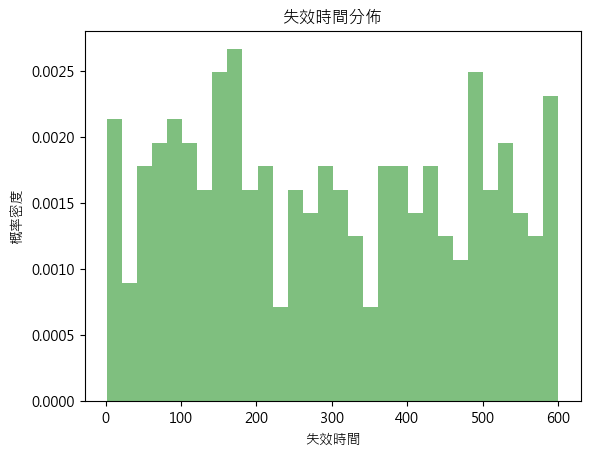

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 在函數外部宣告 ttf_values
ttf_values = []
ttf_upper_bound = 600

def airline_reservation_system(replications, lambda_val, mu_val, experiments_per_replication):
    global ttf_values  # 使用 global 關鍵字來確保在函數內部使用外部的 ttf_values
    fail_count = 0
    ttf_values = []  # 重新初始化 ttf_values
    
    for _ in range(replications):
        experiment_results = []

        for _ in range(experiments_per_replication):
            total_ttf = 0
            state = 2

            while state > 0:
                if total_ttf == ttf_upper_bound:
                    break
                if state == 2:
                    fail = np.random.exponential(1/lambda_val)
                    total_ttf += 1
                    state = 1
                else:
                    fail = np.random.exponential(1/lambda_val)
                    repair = np.random.exponential(1/mu_val)
                    if repair < fail:
                        total_ttf += 1
                        state = 2
                    else:
                        total_ttf += 1
                        state = 0
                        fail_count += 1
                        experiment_results.append(total_ttf)

        ttf_values.extend(experiment_results)
    
    print(f'lambda_val:{lambda_val}, mu_val:{mu_val}')
    # 檢查失效時間是否符合常態分佈
    _, p_value = shapiro(ttf_values)
    fail_rate = fail_count / (replications * experiments_per_replication)
    print(f"批次模擬共 {replications} 次，每次執行 {experiments_per_replication} 次實驗後的平均失效時間 (TTF) 在 {ttf_upper_bound} 內的機率為: {fail_rate}")

    # 計算 0.8 位數的分位數
    quantile_08 = np.quantile(ttf_values, 0.8)
    print(f"失效時間 (TTF) 的 0.8 位數分位數為: {quantile_08}")
    
    # 計算平均失效時間在 600 內的機率的 95% 信心區間
    fail_rate_ci = stats.norm.interval(0.95, loc=fail_rate, scale=stats.sem(ttf_values))

    # 計算失效時間的 0.8 位數分位數的 95% 信心區間
    quantile_08_ci = np.percentile(ttf_values, [10, 90])
    
    print(f"失效時間 (TTF) 的 0.8 位數分位數的 95% 信心區間：{quantile_08_ci}")

    return p_value, fail_rate, quantile_08

# 設定參數
max_replications = 1000
experiments_per_replication = 10  # 每次模擬執行的實驗次數
replications = int(max_replications/experiments_per_replication)


# 執行模擬
p_value, fail_rate, quantile_08 = airline_reservation_system(replications, lambda_val=1, mu_val=800, experiments_per_replication=experiments_per_replication)

# 判斷結果
if p_value < 0.05:
    print(f"Shapiro-Wilk 測試的 p-value 為: {p_value}，拒絕虛無假設，失效時間數據不符合常態分佈。")
else:
    print(f"Shapiro-Wilk 測試的 p-value 為: {p_value}，無法拒絕虛無假設，失效時間數據在統計上可能符合常態分佈。")

# 繪製直方圖和 PDF 圖表
plt.hist(ttf_values, bins=30, density=True, alpha=0.5, color='g')
plt.title('失效時間分佈')
plt.xlabel('失效時間')
plt.ylabel('概率密度')
plt.show()
